# Computer Vision Assignment-1

In [ ]:
Computer Vision(CG7GV1)
Name: Ashish Kannur
Student Id: 19300875

In [25]:
# libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import rcParams

## 1. Histograms (20 marks):
## a. Read a RGB colour image (e.g. png) and display it.

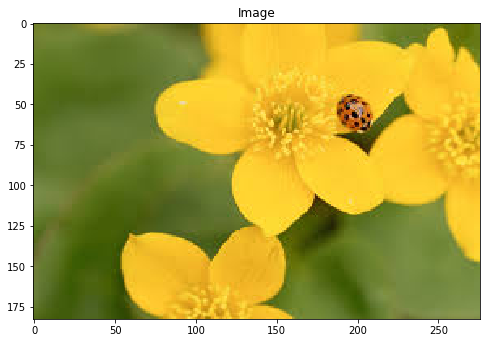

In [34]:
img1=cv2.imread('flower.png',1)
#used cv2 function to convert to different image format
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.figure()
plt.title('Image')
plt.imshow(img2)

## 1b. Convert the RGB image into Lab colour system and display each component (L,a,b) as an grey level image 
(See section 2.7.4 in
http://www.ee.columbia.edu/ln/dvmm/publications/PhD_theses/jrsmith-thesis.pdf).

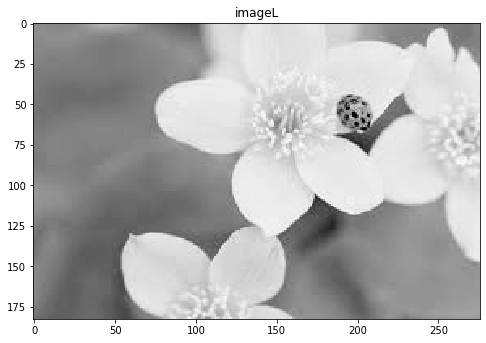

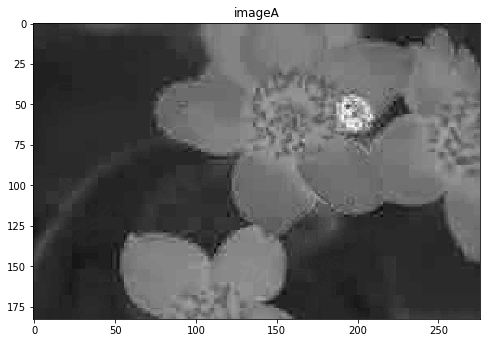

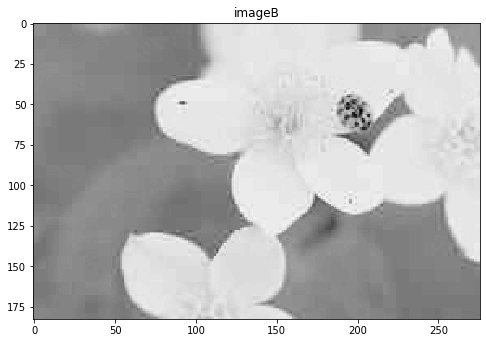

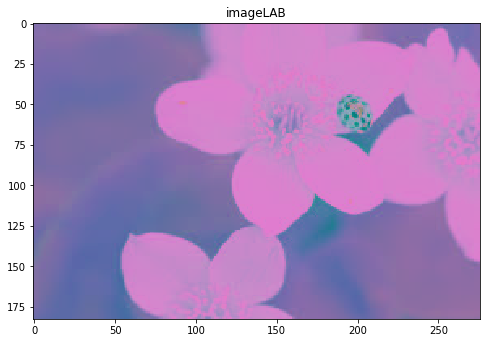

In [35]:
import cv2 
import matplotlib.pyplot as plt
img1 = cv2.imread('flower.png') 

#to LAB
lab = cv2.cvtColor(img1, cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(lab)

rcParams['figure.figsize'] = 8,6
plt.figure()
plt.title('imageL')
plt.imshow(l,'gray') #imageL
plt.figure()
plt.title('imageA')
plt.imshow(a,'gray') #imageA
plt.figure()
plt.title('imageB')
plt.imshow(b,'gray') #imageB
plt.figure()
plt.title('imageLAB')
plt.imshow(lab,'gray')  #image



## 1c. Compute the spatial derivatives of the luminance component L in the horizontal and vertical direction using convolution by the derivatives of Gaussian filter. Display each these derivatives as grey level images.

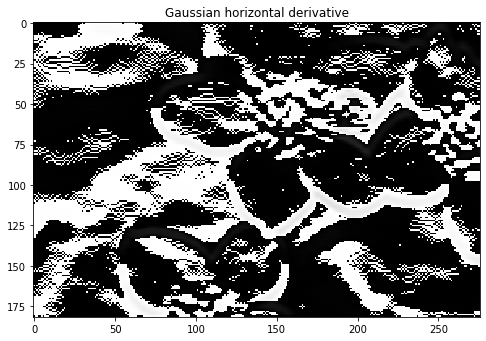

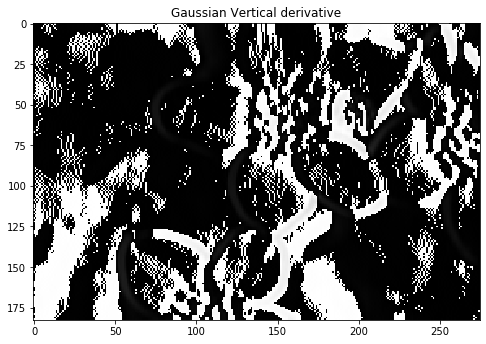

In [36]:
import numpy as np
gaussimg = cv2.GaussianBlur(l_channel,(5,5),5,5)
rcParams['figure.figsize'] = 8,6    
#Derivative along dx
hdimg = np.diff(gaussimg,axis=0)
plt.figure()
plt.title('Gaussian horizontal derivative')
plt.imshow(hdimg,'gray')
   
#Derivative along dy
vdimg = np.diff(gaussimg,axis=1)
plt.figure()
plt.title('Gaussian Vertical derivative')
plt.imshow(vdimg,'gray')

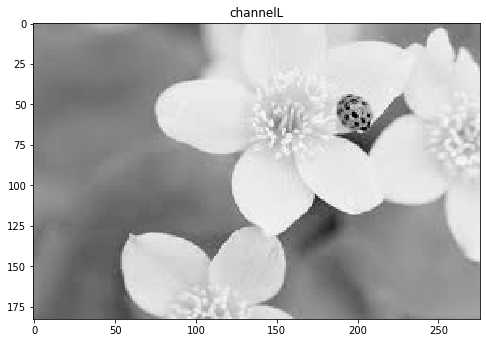

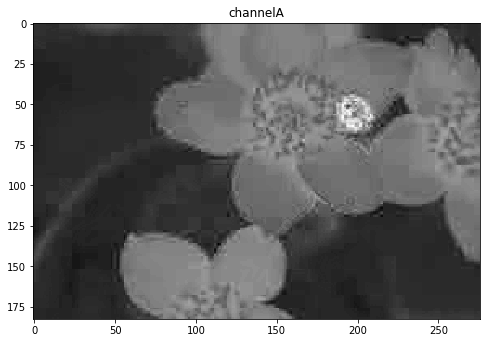

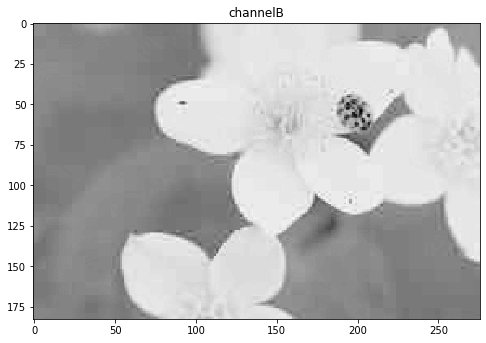

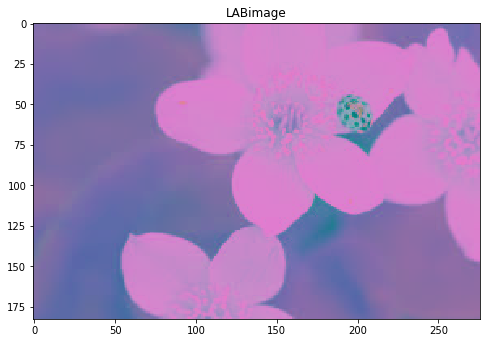

In [38]:
#extract LAB channels from image 
import cv2 
import matplotlib.pyplot as plt
img = cv2.imread('flower.png') 

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(lab)

rcParams['figure.figsize'] = 8,6
plt.figure()
plt.title('channelL')
plt.imshow(l) #imageL
plt.figure()
plt.title('channelA')
plt.imshow(a) #imageA
plt.figure()
plt.title('channelB')
plt.imshow(b) #imageB
plt.figure()
plt.title('LABimage')
plt.imshow(lab)  #image

## 1d. Compute a 2D histogram with the chrominance component (a,b) and display the histogram as a grey image (heat map) and/or as a 3D surface (bar plot)


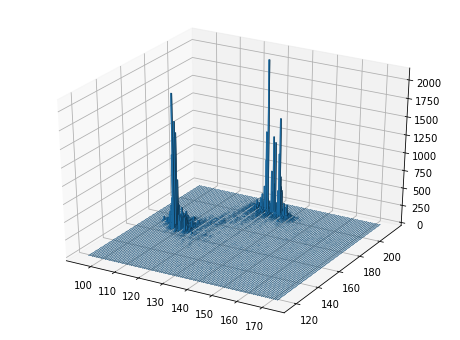

<Figure size 576x432 with 0 Axes>

In [39]:
import matplotlib.colors as colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xbins, ybins = np.histogram2d(a.ravel(),b.ravel(),bins=100)
plt.figure()

# Construct arrays for the anchor positions with 16 bars.
xpos, ypos = np.meshgrid(xbins[:-1] + 0.25, ybins[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

## 1e. Using a part of the image to compute a 2D histogram model with the chrominance component (a,b), compute a back projection map with this model histogram in the target image (i.e. see BP1 section 5.3 in
http://www.ee.columbia.edu/dvmm/publications/PhD_theses/jrsmith-thesis.pdf ).

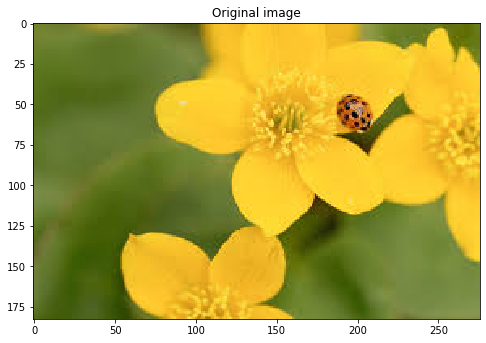

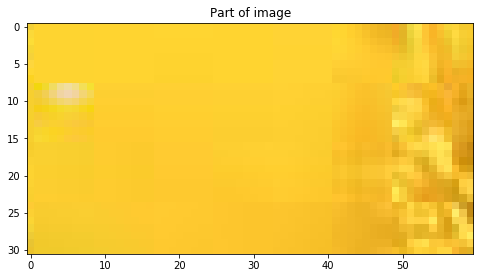

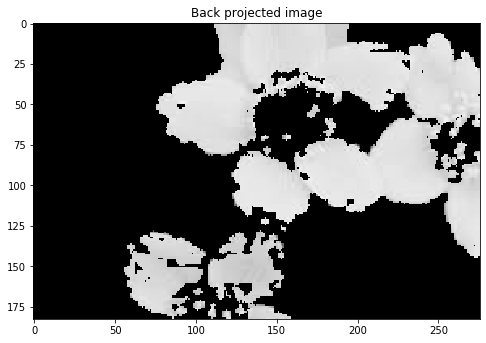

In [42]:
srcimg = cv2.cvtColor(cv2.imread("flower.png"), cv2.COLOR_BGR2RGB)


tgtimg = cv2.cvtColor(cv2.imread("flowerpart.png"), cv2.COLOR_BGR2RGB)

tgtimglab = cv2.cvtColor(cv2.imread("flowerpart.png"), cv2.COLOR_BGR2LAB)
srcimglab = cv2.cvtColor(cv2.imread("flower.png"), cv2.COLOR_BGR2LAB)

tgthist = cv2.calcHist([tgtimglab], [1, 2], None, [256, 256], [0, 256, 0, 256])
tgtbp = cv2.calcBackProject([srcimglab],[1,2],tgthist,[0,256,0,256],1)

#Remove Noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
tgtbp = cv2.filter2D(tgtbp,-1,kernel)

#finetuning
_, tgtbp = cv2.threshold(tgtbp, 127, 255, cv2.THRESH_BINARY)
tgtbp = cv2.merge((tgtbp, tgtbp, tgtbp))
res = cv2.bitwise_and(srcimg,tgtbp)

bpimg = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
rcParams['figure.figsize'] = 8,6
plt.figure()
plt.title('Original image')
plt.imshow(srcimg) #Original image
plt.figure()
plt.title('Part of image')
plt.imshow(tgtimg) #Part of image
plt.figure()
plt.title('Back projected image')
plt.imshow(bpimg,cmap='gray') #back projected image

## 1f. Perform histogram equalization using 1D histogram using the luminance L computed in 1.a. Display the resulting image with enhanced contrast (e.g. https://en.wikipedia.org/wiki/Histogram_equalization )


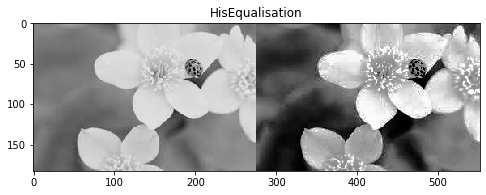

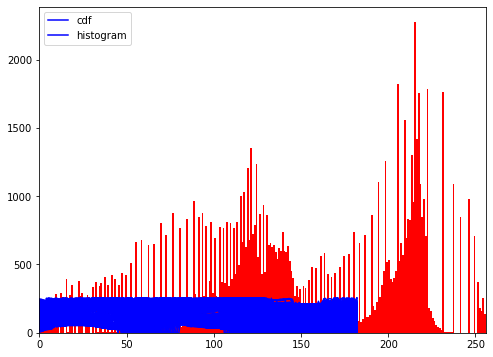

In [44]:

import cv2
import numpy as np
img = cv2.imread('flower.png')

labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(labimg)

#Equalize histogram
histeq = cv2.equalizeHist(l) 

#stack images 
result = np.hstack((l,histeq)) 
cv2.imwrite('Histeq.png',result) #print response in png file
rcParams['figure.figsize'] = 8,6
plt.figure()
plt.title('HisEqualisation')
plt.imshow(result,'gray')

plt.figure()
plt.plot(result, color = 'b')
plt.hist(result.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## 1g. Evaluate the performance of these techniques with histograms (i.e. illustrate when it works, and when it does not work).

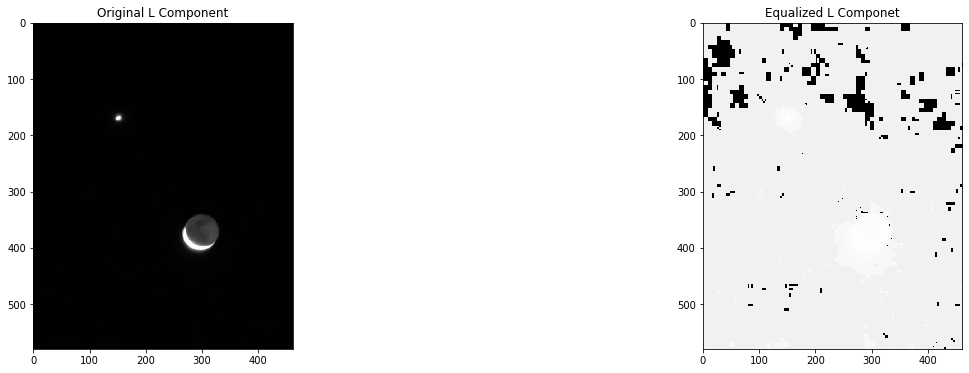

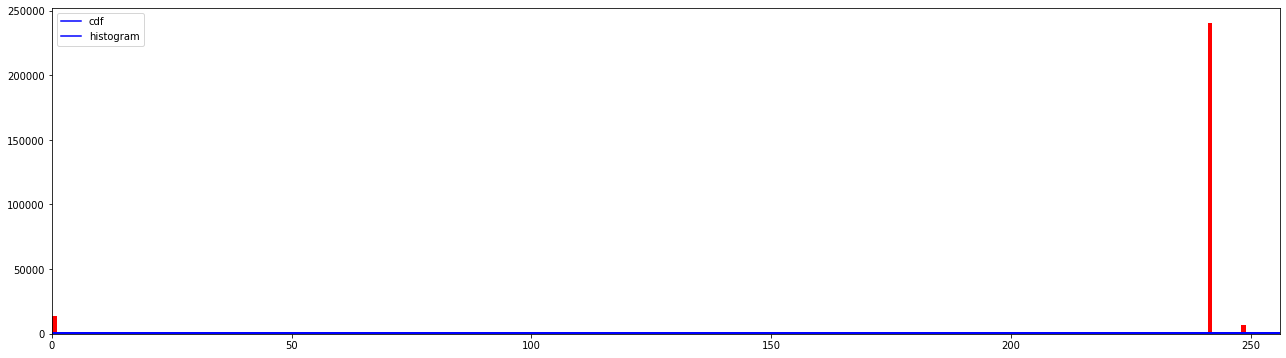

In [46]:
from matplotlib import rcParams

img=cv2.imread('image_to_equalize.jpg',1)
labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#Calclate the LAB coponents
l,a,b = cv2.split(labimg)

#Compute histogram
eq_ch = []
eq_ch.append(cv2.equalizeHist(l))
equalizedimage = cv2.merge(eq_ch)

rcParams['figure.figsize'] = (22 ,6)
fig,ax = plt.subplots(1,2)
ax[0].imshow(l,cmap="gray")
ax[0].title.set_text('Original L Component')
ax[1].imshow(equalizedimage,cmap="gray")
ax[1].title.set_text('Equalized L Componet')

plt.figure()
plt.plot(equalizedimage, color = 'b')
plt.hist(equalizedimage.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## PCA
## 2a. Compute the mean image and principal components for a set of images (e.g. use the training images of ‘5’ in the mnist dataset). Display the mean image and the first 2 principal components (associated with the highest eigenvalues).

In [11]:
#required libs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
import tensorflow as tf

In [48]:
imgs,lbs = fetch_openml('mnist_784', version=1, return_X_y=True)
trainsize= 60000 #The size of the training set
trainimages = imgs[:trainsize]
trainlabels = lbs[:trainsize]
testimages = imgs[trainsize:]
testlabels = lbs[trainsize:]

#filter out the images of 5 for training
train_images = trainimages.astype(np.float32)/255
train_labels = trainlabels.astype(np.float32)
test_images = testimages.astype(np.float32)/255
test_labels = testlabels.astype(np.float32)
labels_5 = np.where(train_labels == 5)
all5s = train_images[list(labels_5)]


X=all5s
num_data,dim = X.shape

#calc mean
mean_X = X.mean(axis=0)
X = X-mean_X
#for higher dimension images
if dim>num_data:
    covM = np.dot(X,X.T) #covariance matrix
    eg,EV = np.linalg.eigh(covM) #eigenvalues and eigne vectors
    tmp = np.dot(X.T,EV).T  #vector multiplication to match the dimension
    egV = tmp[::-1] #reverce to get the highest eigen vectors
    egS = np.sqrt(eg)[::-1] #reverse the vector to get highest eigen values
    for i in range(egV.shape[1]):
        egV[:,i] /= egS
else:
    U,egS,egV = np.linalg.svd(X)
    egV = egV[:num_data] ##Generate Eigenvalues,eigenvectors and mean image: egV,egS and mean_X

#Construct the test image for pca
lab = np.where(test_labels == 5)
imgs = test_images[list(lab)]
testimage = imgs[10]

C:\Users\ashishkannur91\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
C:\Users\ashishkannur91\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [49]:
all5s.shape

(5421, 784)

<Figure size 1584x432 with 0 Axes>

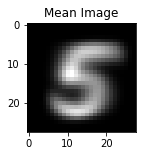

<Figure size 1584x432 with 0 Axes>

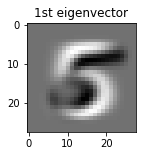

<Figure size 1584x432 with 0 Axes>

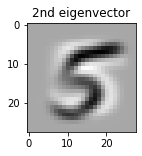

In [50]:

#Plot mean and first two eigenvectors
plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(mean_X.reshape(28,28))
plt.title("Mean Image")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(egV[0].reshape(28,28))
plt.title("1st eigenvector")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(egV[1].reshape(28,28))
plt.title("2nd eigenvector")
plt.show()

## 2b. Compute and display the reconstructions of a test image using the mean image and with p principal components associated with the p highest eigenvalues (e.g. Fig 10.12) with p=10 and p=50.

<Figure size 1584x432 with 0 Axes>

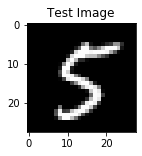

<Figure size 1584x432 with 0 Axes>

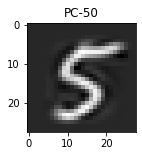

<Figure size 1584x432 with 0 Axes>

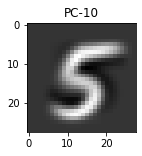

In [52]:
#pca10 = reconstImage(egV[:10],egS,mean_X,test_img)
pca10 = np.dot(np.dot(testimage - mean_X,egV[:10].T),egV[:10]) + mean_X
pca50 = np.dot(np.dot(testimage - mean_X,egV[:50].T),egV[:50]) + mean_X
pca_all = np.dot(np.dot(testimage - mean_X,egV[:784].T),egV[:784]) + mean_X

img_dict = {0:('Test Image',testimage),1:('PC-50',pca50),2:('PC-10',pca10)}
plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(testimage.reshape(28,28))
plt.title("Test Image")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(pca50.reshape(28,28))
plt.title("PC-50")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(pca10.reshape(28,28))
plt.title("PC-10")
plt.show()

## 2c. Read https://doi.org/10.1109/34.598227 ‘Probabilistic visual learning for object representation’ (PAMI1997). Compute and display a DFFS (distance-from feature-space)  and SSD (sum-of-square-differences) heat maps for detection using your PCA representation of a MNIST number. For the test image, use a composite image made of MNIST test images (see example below).

C:\Users\ashishkannur91\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  app.launch_new_instance()


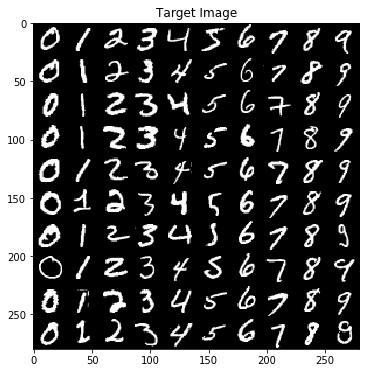

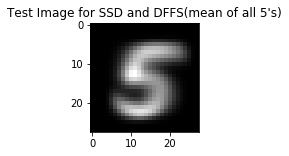

In [66]:
#Test Image for ssd and dffs

test_img_scale =  []

for i in range(10):
    for j in range(10):
        label_i = np.where(train_labels == j)
        test_img_scale.append(train_imgs[label_i[0][i]])

temp = np.hstack( (np.asarray([ i.reshape(28,28) for i in test_img_scale ])))

test_img_scale =  []
for i in range(0,temp.shape[1],280):
    test_img_scale.append(np.array(temp[0:28,0+i:280+i]))

test_image = np.vstack(x for x in test_img_scale)

plt.imshow(test_image)
plt.title("Target Image")

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(mean_X.reshape(28,28))
plt.title("Test Image for SSD and DFFS(mean of all 5's)")
plt.show()

target_img = test_image

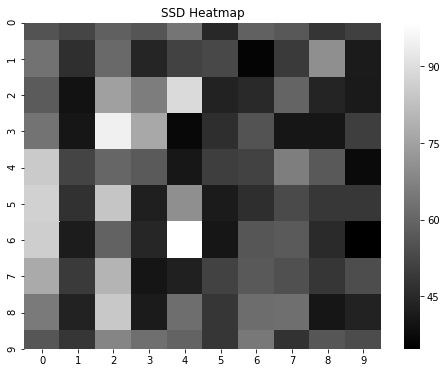

In [67]:
#Heat map for ssd
residual1 = []
for i in range(0,target_img.shape[0],28):
    for j in range(0,target_img.shape[1],28):
        #Calcuate ssd distance matrix
        residual1.append(np.sum(np.square(np.subtract(target_img[i:28+i,j:28+j],mean_X.reshape(28,28)))))
#SSD heatmap
rcParams['figure.figsize'] = 8,6
plt.figure()
plt.title("SSD Heatmap")
sns.heatmap(np.array(residual1).reshape(10,10),cmap='gray')

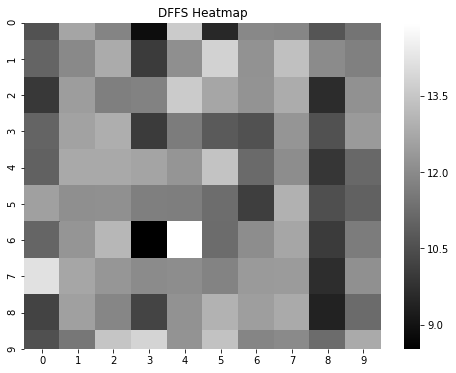

In [68]:
#DFFS heatmap
residual = []
for i in range(0,target_img.shape[0],28):
    for j in range(0,target_img.shape[1],28):
        #Calcuate dffs distance matrix
        residual.append(np.sqrt(np.sum(np.square(np.subtract(np.subtract(target_img[0+i:28+i,j:28+j],mean_X.reshape(28,28)),pca_all.reshape(28,28)))))) 
#DFFS heatmap
rcParams['figure.figsize'] = 8,6
plt.figure()
plt.title("DFFS Heatmap")
sns.heatmap(np.array(residual).reshape(10,10),cmap='gray')

## d. Evaluate the performance of SSD and DFFS (i.e. illustrate when it works, and when it does not work).

SSD heatmap is better as compared to DFFS heatmap. However the situation varies.The target image set which contains digits 0 to 9, has a lot of variations. I have plotted the DFFS and SSD by sliding the test image over each digit image in the target image. It all depends on the pixel values. Where ever the pixel values of the test image and digit in the target image match / we get a minimum difference and hence a black colour in the heatmap.